In [1]:
import numpy as np
from simple.hurst import HurstRS, HurstDMA, HurstDSOD
from funcs import hurst
from simple.numpy import rolling_apply
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.subplot.left'] = 0.04
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.top'] = 0.96
plt.rcParams['figure.subplot.bottom'] = 0.05
plt.rcParams['figure.figsize'] = (16, 5)

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.5

plt.rcParams['axes.spines.top'] = False
plt.rcParams['grid.color'] = 'lightgray'

In [3]:
def hurstSeries(X: np.array, Period: int) -> np.array:
    return rolling_apply(lambda x: hurst(x), Period, X, n_jobs=128, progress=True)

In [4]:
T = np.load('data/ETHUSDT.2022-05-08.tick.npz')['ETHUSDT'].view(np.recarray)
len(T)

95820

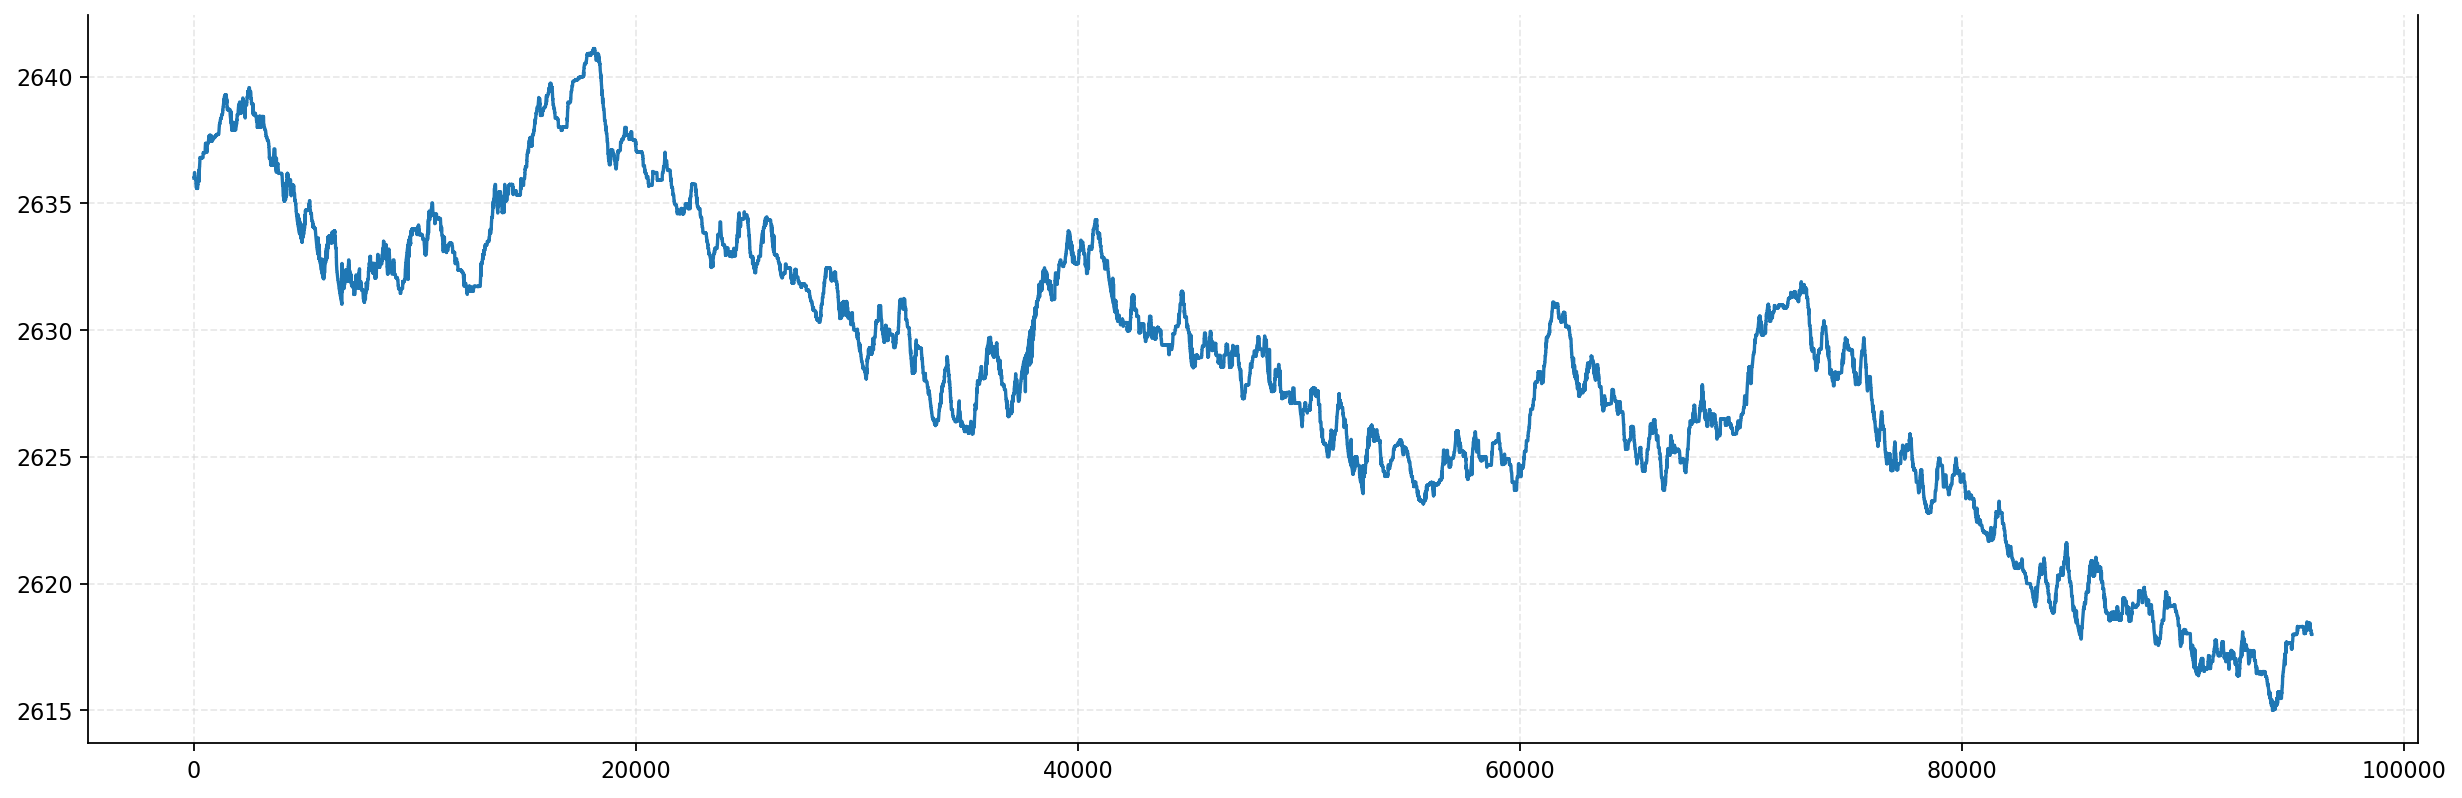

In [5]:
plt.plot(T.PriceA);

  0%|          | 0/92820 [00:00<?, ?it/s]

[0.60985422 0.60996082 0.6100816  0.61022101 0.61037972 0.6105659
 0.61078848 0.61105663 0.61138559 0.61174147]


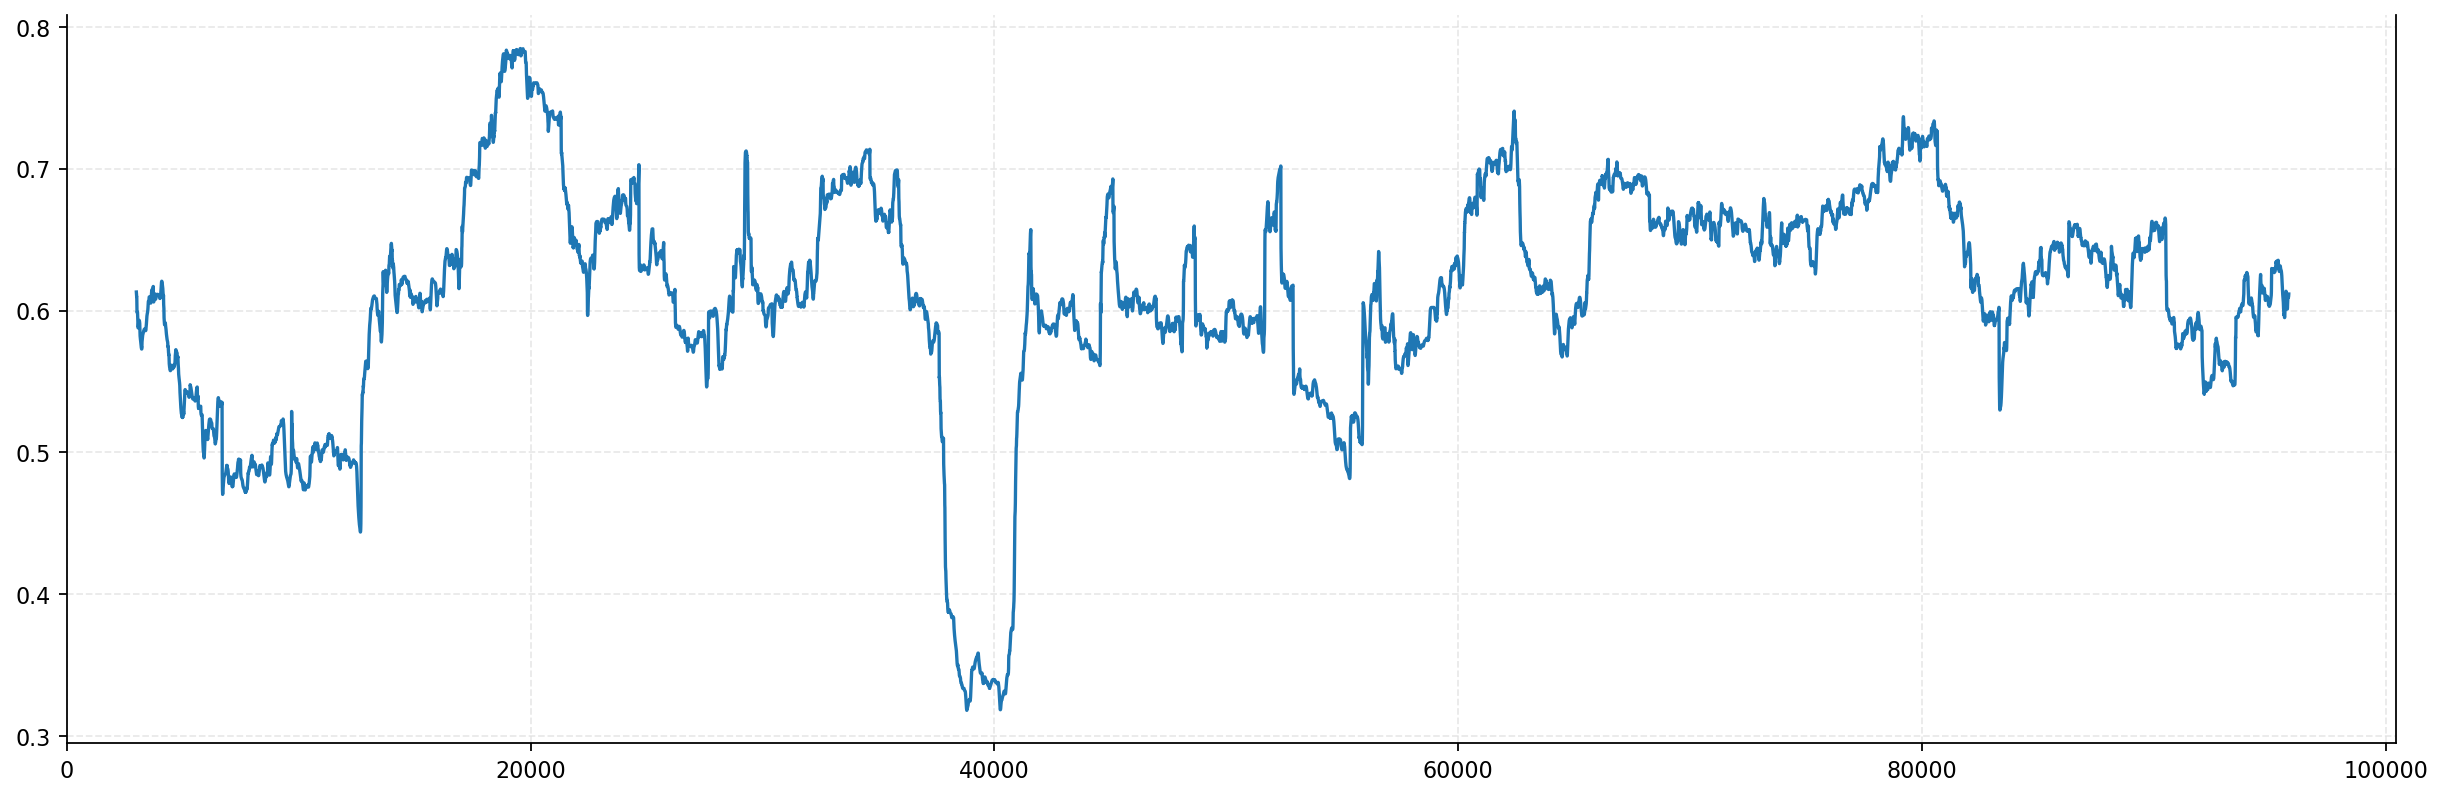

In [6]:
h = hurstSeries(T.PriceA, 3000)
print(h[-10:])

plt.plot(h)
plt.gca().set_xlim(0);

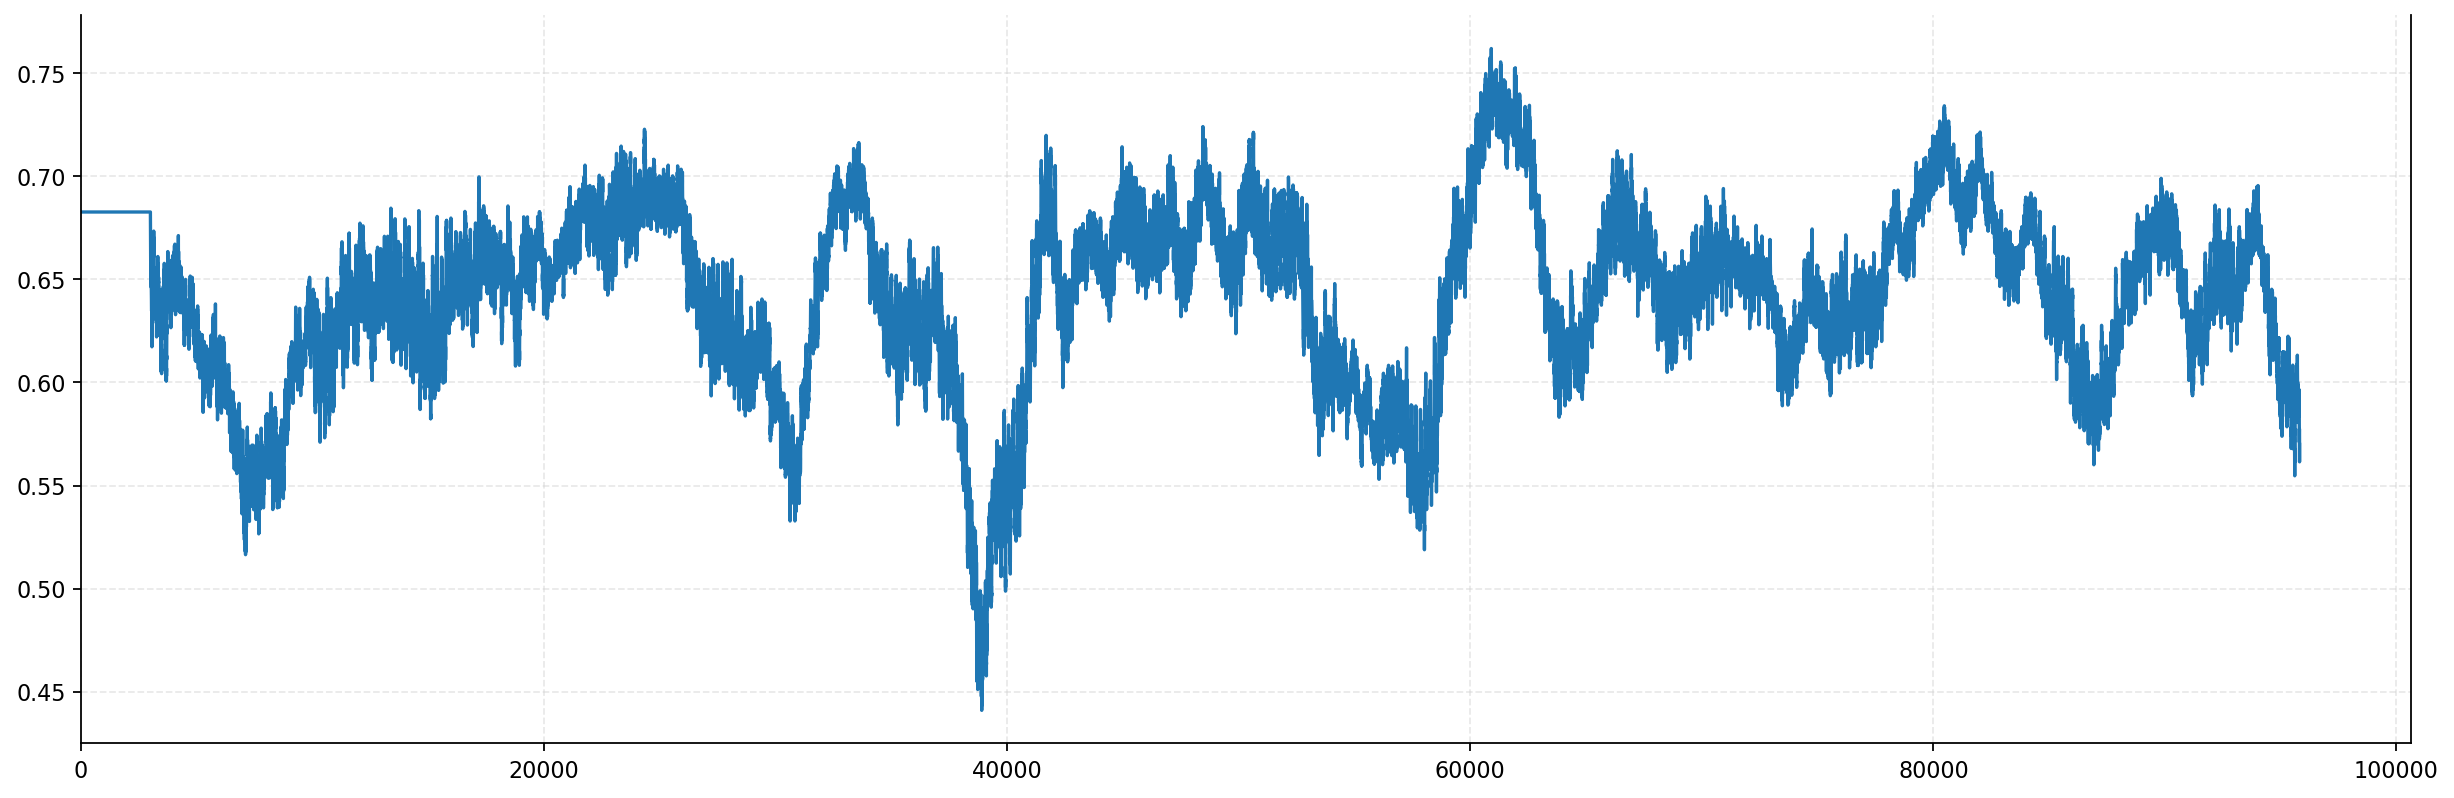

In [7]:
h = HurstRS(np.diff(T.PriceA), 3000)
h[-10:]

plt.plot(h)
plt.gca().set_xlim(0);

[0.67060395 0.67079461 0.67139013 0.67194747 0.67240744 0.67380293
 0.67503717 0.67605669 0.67697008 0.67786918]


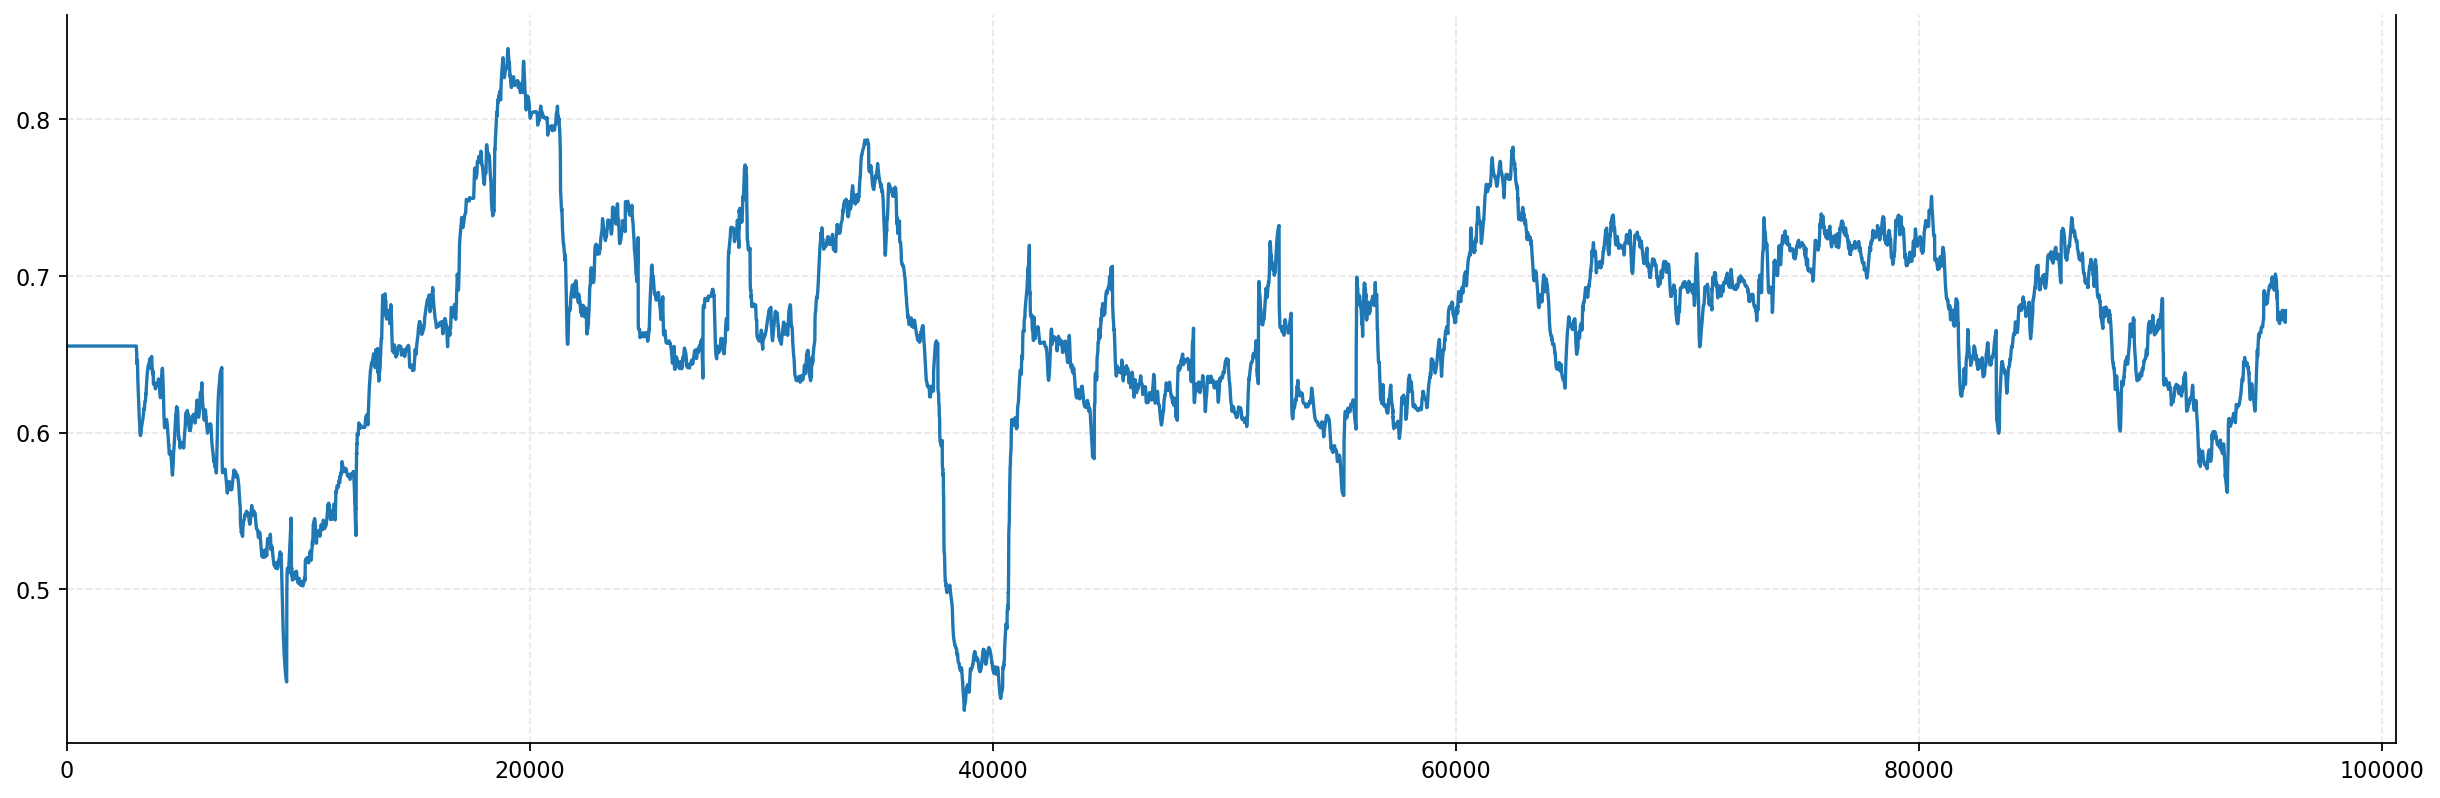

In [8]:
h = HurstDMA(T.PriceA, 3000)
print(h[-10:])
plt.plot(h)
plt.gca().set_xlim(0);

[0.18484214 0.18484214 0.18484214 0.18484214 0.18484214 0.18483564
 0.18427066 0.18373412 0.18391835 0.18407889]


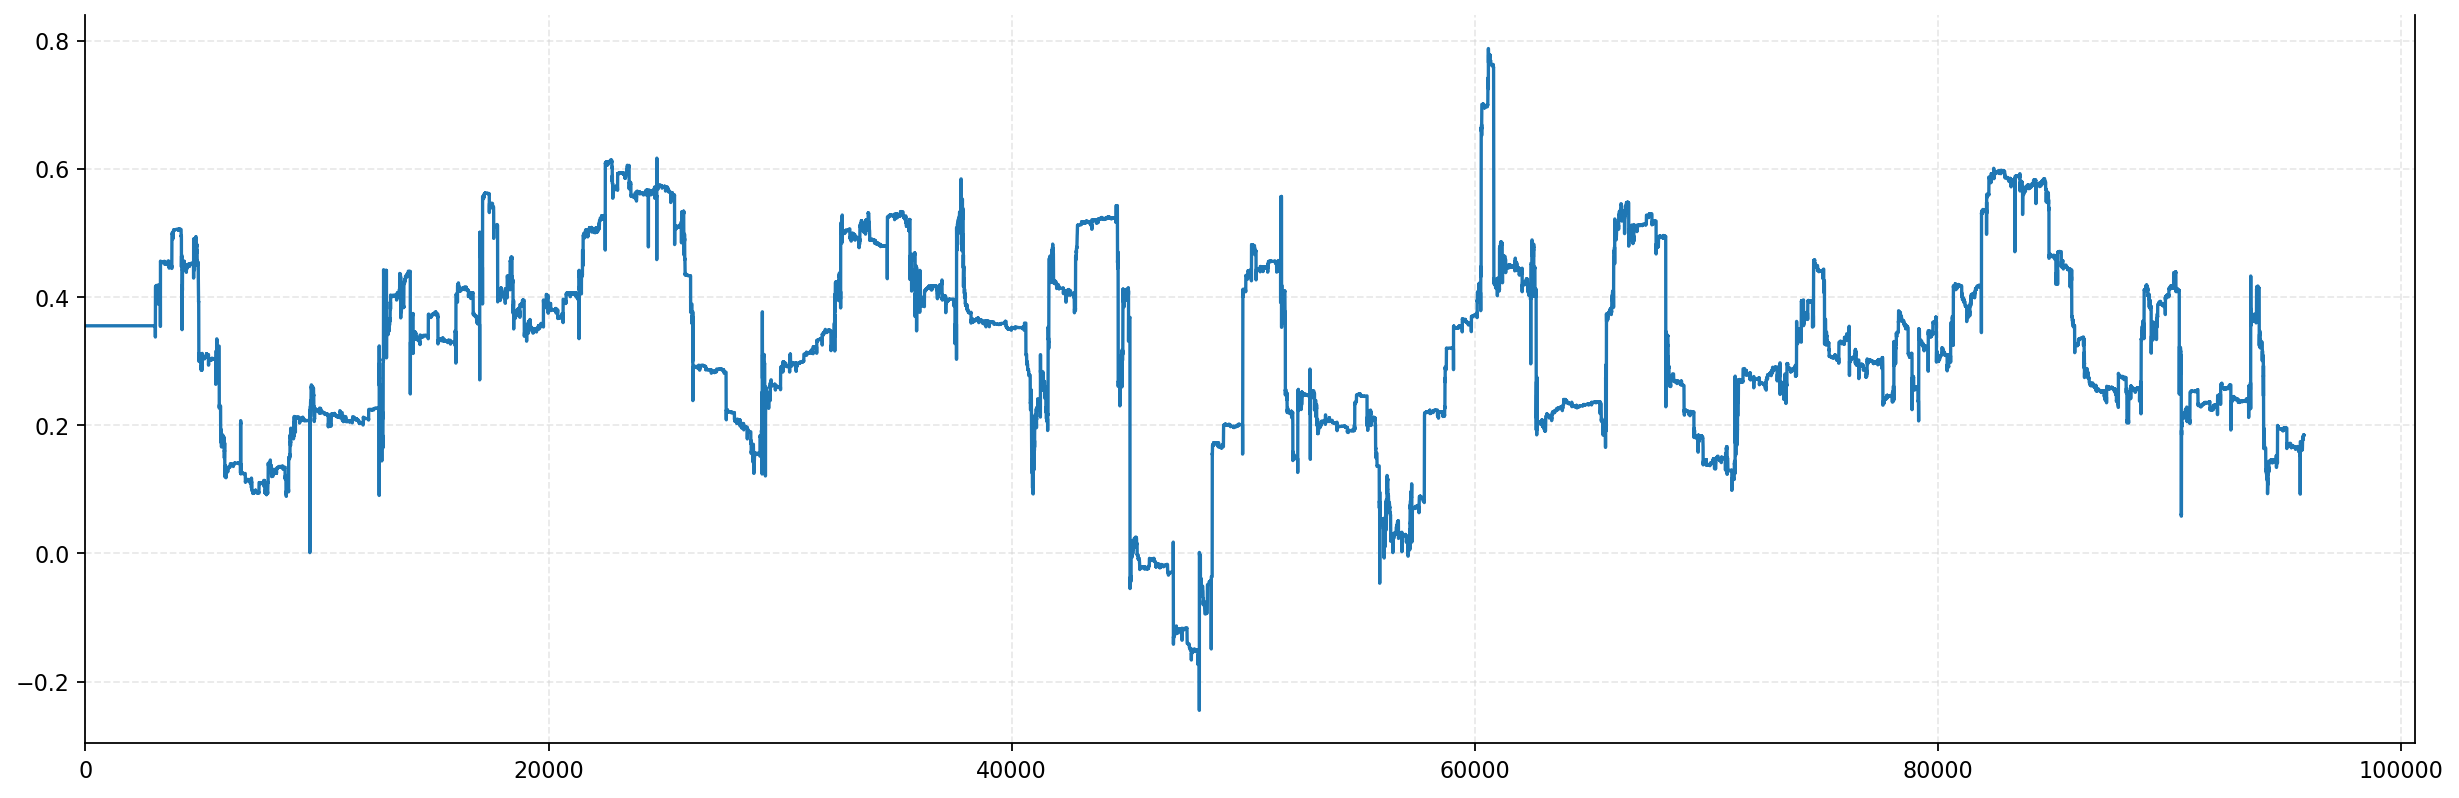

In [9]:
h = HurstDSOD(T.PriceA, 3000)
print(h[-10:])
plt.plot(h)
plt.gca().set_xlim(0);